In [1]:
import warnings
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
EXP_ID = "apch"
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
stats_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_stats.csv")
stats_df.head()

,project,precision,recall,f1,auc,gmean,ap,specifi
0,activemq,0.010862,0.172955,0.138641,0.695312,0.593955,0.322266,0.017290
1,camel,0.308236,0.007243,0.019316,0.062855,0.006219,0.186188,0.131278
2,cassandra,0.982627,0.028417,0.064185,0.728506,0.231059,0.498009,0.308720
3,flink,0.158372,0.001066,0.092545,0.472737,0.000928,0.421045,0.021843
4,groovy,0.935852,0.000586,0.001690,0.013617,0.000027,0.869488,0.327144


In [4]:
# prepare data for heatmap of p-values
annot_p_values = np.array(stats_df.iloc[:, 1:])
p_values = np.where(annot_p_values < ALPHA, 1, 0)
p_values = pd.DataFrame(p_values, columns=stats_df.columns[1:])
annot_p_values = pd.DataFrame(annot_p_values, columns=stats_df.columns[1:])
p_values["project"] = stats_df["project"]
annot_p_values["project"] = stats_df["project"]
p_values = p_values.set_index("project")
annot_p_values = annot_p_values.set_index("project")

p_values = p_values.astype(int)
print(p_values.head())

annot_p_values = annot_p_values.round(3)
print(annot_p_values.head())

           precision  recall  f1  auc  gmean  ap  specifi
project                                                  
activemq           1       0   0    0      0   0        1
camel              0       1   1    0      1   0        0
cassandra          0       1   0    0      0   0        0
flink              0       1   0    0      1   0        1
groovy             0       1   1    1      1   0        0
           precision  recall     f1    auc  gmean     ap  specifi
project                                                          
activemq       0.011   0.173  0.139  0.695  0.594  0.322    0.017
camel          0.308   0.007  0.019  0.063  0.006  0.186    0.131
cassandra      0.983   0.028  0.064  0.729  0.231  0.498    0.309
flink          0.158   0.001  0.093  0.473  0.001  0.421    0.022
groovy         0.936   0.001  0.002  0.014  0.000  0.869    0.327


In [5]:
# print latex table
print(annot_p_values.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  precision &  recall &     f1 &    auc &  gmean &     ap &  specifi \\
project   &            &         &        &        &        &        &          \\
\midrule
activemq  &      0.011 &   0.173 &  0.139 &  0.695 &  0.594 &  0.322 &    0.017 \\
camel     &      0.308 &   0.007 &  0.019 &  0.063 &  0.006 &  0.186 &    0.131 \\
cassandra &      0.983 &   0.028 &  0.064 &  0.729 &  0.231 &  0.498 &    0.309 \\
flink     &      0.158 &   0.001 &  0.093 &  0.473 &  0.001 &  0.421 &    0.022 \\
groovy    &      0.936 &   0.001 &  0.002 &  0.014 &  0.000 &  0.869 &    0.327 \\
hbase     &      0.000 &   0.000 &  0.247 &  0.445 &  0.035 &  0.482 &    0.000 \\
hive      &      0.391 &   0.023 &  0.626 &  0.326 &  0.855 &  0.153 &    0.101 \\
ignite    &      0.067 &   0.885 &  0.438 &  0.510 &  0.868 &  0.942 &    0.293 \\
\bottomrule
\end{tabular}



<AxesSubplot: ylabel='project'>

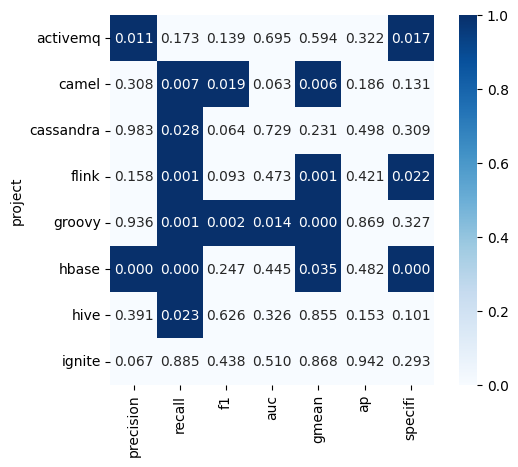

In [6]:
sns.heatmap(p_values, annot=annot_p_values, cmap="Blues", fmt=".3f", vmin=0, vmax=1, square=True)